In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


In [2]:
h_DM = np.load("darkmatter_1000GeV.pkl", allow_pickle = True, encoding='latin1')
h_DM_errors2 = np.load("darkmatter_1000GeV_errors2.pkl", allow_pickle = True, encoding='latin1')

hatmos = np.load("atmos.pkl", allow_pickle = True, encoding='latin1')
hatmos_errors2 = np.load("atmos_errors2.pkl", allow_pickle = True, encoding='latin1')

hastro = np.load("astro.pkl", allow_pickle = True, encoding='latin1')
hastro_errors2 = np.load("astro_errors2.pkl", allow_pickle = True, encoding='latin1')

hcorsika = np.load("corsika.pkl", allow_pickle = True, encoding='latin1')
hcorsika = np.load("corsika_errors2.pkl", allow_pickle = True, encoding='latin1')


rateDM = np.sum(h_DM[0])
rateCorsika = np.sum(hcorsika[0])
rateAstro = np.sum(hastro[0])
rateAtmos = np.sum(hatmos[0])

livetime      = 28272940. + 30674072. + 31511810.5 + 31150852. + 30059465.

total_events = np.int(livetime*(rateCorsika + rateAtmos + rateAstro))

print ("Total number of events {:d}".format(total_events))

fraction_astro  = rateAstro / (rateCorsika + rateAtmos + rateAstro)
fraction_atmos  = rateAtmos / (rateCorsika + rateAtmos + rateAstro)

print ("Fraction of astro {:.2f}".format(fraction_astro))
print ("Fraction of atmos {:.2f}".format(fraction_atmos))



Total number of events 18994
Fraction of astro 0.09
Fraction of atmos 0.91


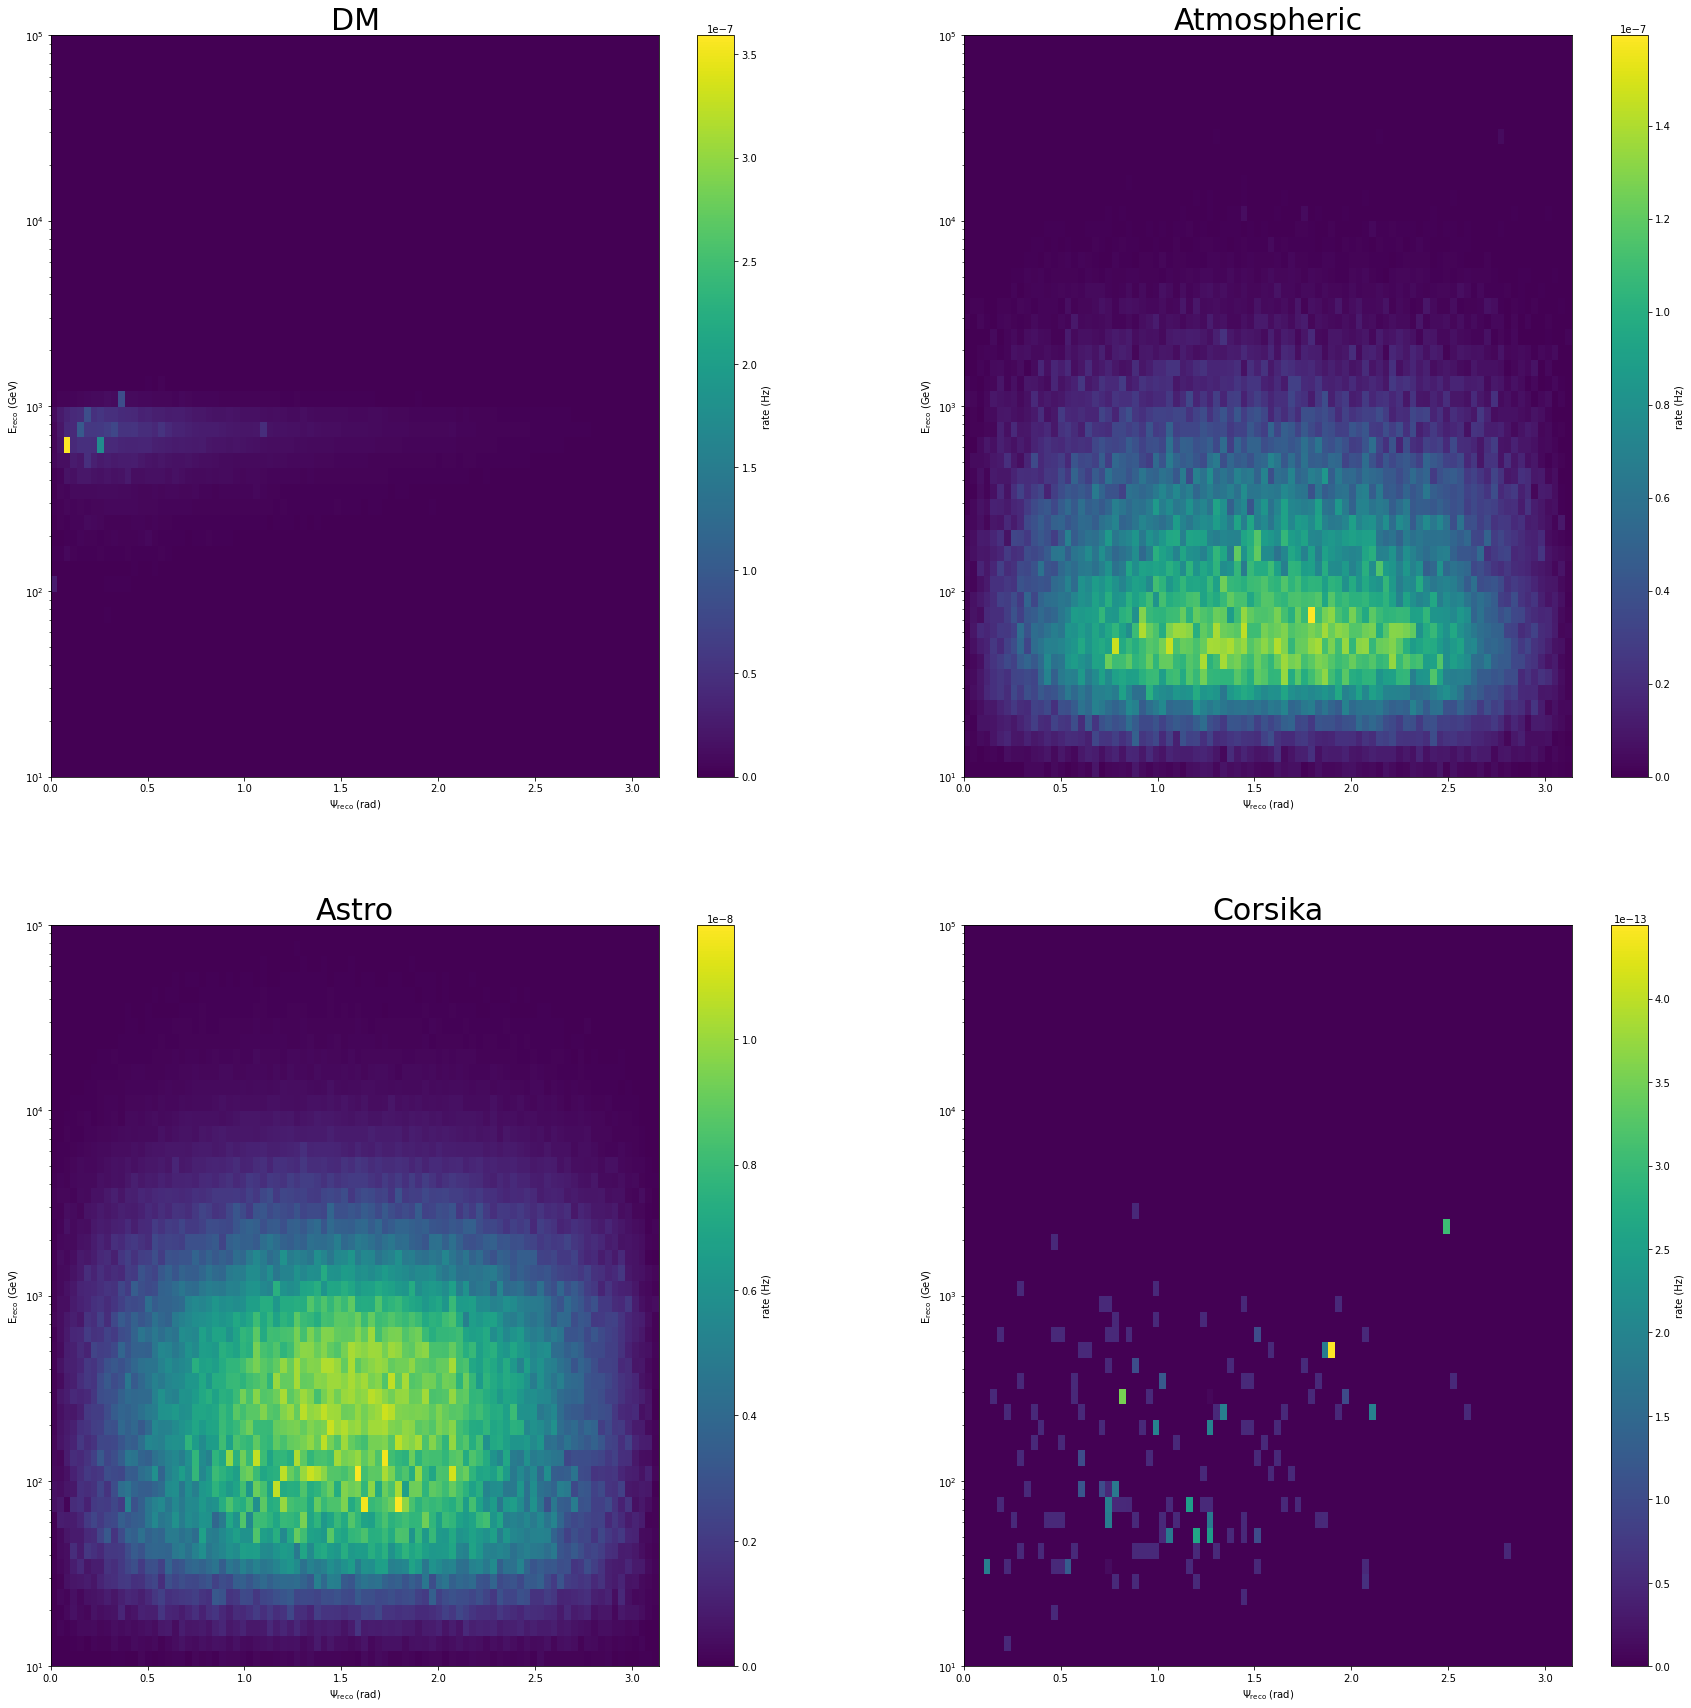

In [3]:
fig,axs = plt.subplots(2,2,figsize=(30,30))
pcm = axs[0,0].pcolormesh(h_DM[2],h_DM[1],h_DM[0])
fig.colorbar(pcm, ax=axs[0,0], label='rate (Hz)')
axs[0,0].set_title("DM", fontsize=30)
axs[0,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,0].set_yscale('log')

pcm = axs[0,1].pcolormesh(hatmos[2],hatmos[1],hatmos[0])
fig.colorbar(pcm, ax=axs[0,1], label='rate (Hz)')
axs[0,1].set_title("Atmospheric", fontsize=30)
axs[0,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,1].set_yscale('log')

pcm = axs[1,0].pcolormesh(hastro[2],hastro[1],hastro[0])
fig.colorbar(pcm, ax=axs[1,0], label='rate (Hz)')
axs[1,0].set_title("Astro", fontsize=30)
axs[1,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,0].set_yscale('log')


pcm = axs[1,1].pcolormesh(hcorsika[2],hcorsika[1],hcorsika[0])
fig.colorbar(pcm, ax=axs[1,1], label='rate (Hz)')
axs[1,1].set_title("Corsika", fontsize=30)
axs[1,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,1].set_yscale('log')

In [4]:
shape = h_DM[0].shape

In [5]:
from modeling import PdfBase, Model, Parameter



In [6]:
SignalPDF = PdfBase(h_DM[0].flatten()/np.sum(h_DM[0].flatten()), name="SignalPDF")
AtmosPDF = PdfBase(hatmos[0].flatten()/np.sum(hatmos[0].flatten()), name="AtmosPDF")
CorsikaPDF = PdfBase(hcorsika[0].flatten()/np.sum(hcorsika[0].flatten()), name="CorsikaPDF")
AstroPDF = PdfBase(hastro[0].flatten()/np.sum(hastro[0].flatten()), name="AstroPDF")




In [7]:
nsig = Parameter(value=0, limits=(0,1), fixed=False, name="n1")
natmos = Parameter(value=fraction_atmos, limits=(0,1), fixed=False, name="n2")
nastro = Parameter(value=fraction_astro, limits=(0,1), fixed=False, name="n3")


In [8]:

model = nsig * SignalPDF + (1 - nsig) * (natmos * AtmosPDF + nastro * AstroPDF + (1 - nastro - natmos)*CorsikaPDF)
#model =  (1 - (nastro + natmos) )# *CorsikaPDF


Parameter n3 already exists in the model, it won't be added again
Parameter n2 already exists in the model, it won't be added again
Parameter n1 already exists in the model, it won't be added again


In [9]:
print(model)

model._parameters["n1"].value = 0.003

 Model: n1*SignalPDF + (1-n1)*(n2*AtmosPDF + n3*AstroPDF + (1-n3 - n2) * CorsikaPDF)
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 - n1, limits = (0,1),  Is it Fixed? False
 - n2, limits = (0,1),  Is it Fixed? False
 - n3, limits = (0,1),  Is it Fixed? False


In [10]:
from data import DataSet

In [11]:
ds = DataSet()

ds.sample(total_events, model)

In [12]:
print (ds.values)

[0 0 0 ... 0 0 0]


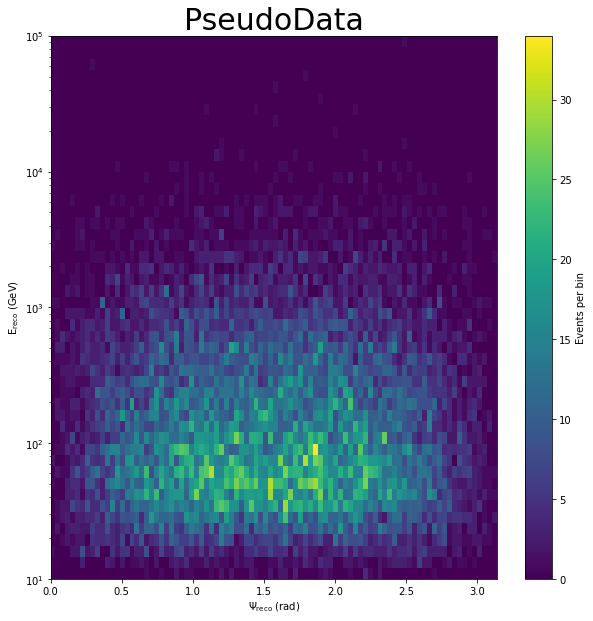

In [13]:
fig,axs = plt.subplots(1,1,figsize=(10,10))

pcm = axs.pcolormesh(hcorsika[2],hcorsika[1],np.reshape(ds.values, shape))
fig.colorbar(pcm, ax=axs, label='Events per bin')
axs.set_title("PseudoData", fontsize=30)
axs.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs.set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs.set_yscale('log')


In [14]:
print (model.nparameters)

3


In [15]:
params = [0.2,0.2,0.1]

for z, p in zip(iter(model._parameters.values()), params):
    z.value = p

In [16]:
from importlib import reload  

In [17]:

import llh
reload(llh)
from llh import LikelihoodRatioTest

In [21]:
analysis = LikelihoodRatioTest(model, data=ds)        

In [22]:
print (analysis)

 Model: n1*SignalPDF + (1-n1)*(n2*AtmosPDF + n3*AstroPDF + (1-n3 - n2) * CorsikaPDF)
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 - n1, limits = (0,1),  Is it Fixed? False
 - n2, limits = (0,1),  Is it Fixed? False
 - n3, limits = (0,1),  Is it Fixed? False
DataSet type simulation
Total number of events: 19114
Minimizer 


In [23]:
analysis.LLH()

NameError: name 'self' is not defined

In [ ]:
analysis._model.__str__()